In [1]:
#all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [2]:
#read the train and test data
train_dataset = pd.read_csv("../input/digit-recognizer/train.csv")
test_dataset  = pd.read_csv("../input/digit-recognizer/test.csv")
print(train_dataset.shape)
print(test_dataset.shape)

(42000, 785)
(28000, 784)


In [3]:
#explore the data and data-preprocessing
X_train_pixels = train_dataset.iloc[:, 1:]
y_train_lables = train_dataset.iloc[:,0].astype('int32')
print(X_train_pixels.shape)
print(y_train_lables.shape)

(42000, 784)
(42000,)


In [4]:
X_train_pixels = X_train_pixels.values.reshape(-1,28,28,1)
X_train_pixels = X_train_pixels/255.0
X_test_pixels = test_dataset.values.reshape(-1,28,28,1)
X_test_pixels = X_test_pixels/255.0
print(X_train_pixels.shape)
print(X_test_pixels.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


In [5]:
#explore the data and data-preprocessing
#reshappinng the target(lable) dataset, equivalent to the train dataset. 
#here, the target data is categorized as the number of (classes) digits are 0-9
#and that's where keras.utils.to_categorical is used
y_train_lables = tf.keras.utils.to_categorical(y_train_lables,10)
print(y_train_lables.shape)

(42000, 10)


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


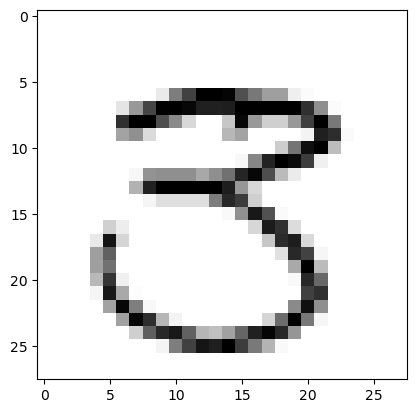

In [6]:
plt.imshow(X_train_pixels[7], cmap="binary")
print(y_train_lables[7])

In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape=(28,28,1)),
  tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.50),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                    

In [9]:
Optimizer = tf.keras.optimizers.Adam(
            learning_rate=0.0005, 
            beta_1=0.9, 
            beta_2=0.999, 
            epsilon=1e-07,
            name='Adam'
)
model.compile(optimizer=Optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(X_train_pixels, y_train_lables, epochs = 25, shuffle = True)

Epoch 1/25
1313/1313 [==============================] - 63s 47ms/step - loss: 0.3059 - accuracy: 0.8996
Epoch 2/25
1313/1313 [==============================] - 61s 46ms/step - loss: 0.0806 - accuracy: 0.9753
Epoch 3/25
1313/1313 [==============================] - 61s 46ms/step - loss: 0.0620 - accuracy: 0.9817
Epoch 4/25
1313/1313 [==============================] - 60s 46ms/step - loss: 0.0452 - accuracy: 0.9868
Epoch 5/25
1313/1313 [==============================] - 60s 46ms/step - loss: 0.0403 - accuracy: 0.9878
Epoch 6/25
1313/1313 [==============================] - 60s 46ms/step - loss: 0.0311 - accuracy: 0.9906
Epoch 7/25
1313/1313 [==============================] - 60s 46ms/step - loss: 0.0303 - accuracy: 0.9904
Epoch 8/25
1313/1313 [==============================] - 61s 46ms/step - loss: 0.0258 - accuracy: 0.9920
Epoch 9/25
1313/1313 [==============================] - 60s 46ms/step - loss: 0.0236 - accuracy: 0.9926
Epoch 10/25
1313/1313 [==============================] - 61s 47m

875/875 [==============================] - 11s 13ms/step
[2 0 9 ... 3 9 2]
(28000,)
9


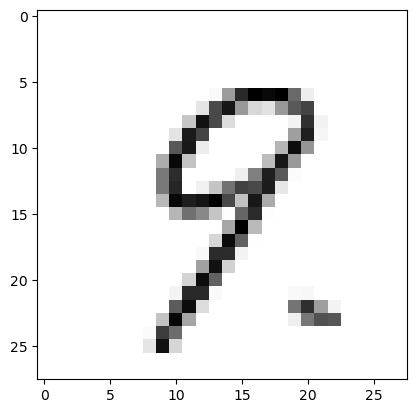

In [11]:
y_pred = model.predict(X_test_pixels)
y_pred = np.argmax(y_pred, axis = 1) 
print(y_pred)
print(y_pred.shape)
print(y_pred[2])
plt.imshow(X_test_pixels[2],cmap="binary")

In [12]:
sample_submission = pd.read_csv('../input/digit-recognizer/sample_submission.csv')
sample_submission['Label'] = y_pred
sample_submission.to_csv('submission.csv',index=False)